Exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

Are younger employees resigning due to some kind of dissatisfaction? What about older employees?


Below is a preview of a couple columns we'll work with from the dete_survey.csv:

    ID: An id used to identify the participant of the survey
    SeparationType: The reason why the person's employment ended
    Cease Date: The year or month the person's employment ended
    DETE Start Date: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the tafe_survey.csv:

    Record ID: An id used to identify the participant of the survey
    Reason for ceasing employment: The reason why the person's employment ended
    LengthofServiceOverall. Overall Length of Service at Institute (in years): 
    The length of the person's employment (in years)


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dete_survey = pd.read_csv("dete_survey.csv", na_values='Not Stated')
tafe_survey = pd.read_csv("tafe_survey.csv", na_values='Not Stated')

In [ ]:
dete_survey.columns

In [ ]:
tafe_survey.columns

In [ ]:
dete_survey.shape

In [ ]:
tafe_survey.shape

## Missing or null values

In [ ]:
dete_survey.isnull().sum()

In [ ]:
tafe_survey.isnull().sum()

In [ ]:
numeric_features = dete_survey.select_dtypes(include=['int64', 'float64']).columns
categorical_features = dete_survey.select_dtypes(include=['object']).columns
print(numeric_features)
print(len(categorical_features))


In [ ]:
print(dete_survey.describe())

In [ ]:
dete_survey.duplicated().sum()

In [ ]:
tafe_survey.duplicated().sum()

In [ ]:
dete_survey.isna().sum()

In [ ]:
tafe_survey.isna().sum()

In [ ]:
dete_survey['SeparationType'].value_counts()

In [ ]:
tafe_survey['Reason for ceasing employment'].value_counts()

In [ ]:
tafe_survey['Main Factor. Which of these was the main factor for leaving?'].value_counts()

In [ ]:
%matplotlib  inline

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# dete_survey.hist(bins=5, figsize=(20, 15))

In [ ]:
# tafe_survey.hist(bins=25, figsize=(20, 15))

In [ ]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]

In [ ]:
'''
for char in spec_chars:
    df['title'] = df['title'].str.replace(char, ' ')
'''

In [ ]:
dete_survey.columns[28:49]

In [ ]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

In [ ]:
tafe_survey.columns[17:66]

In [ ]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [ ]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace('.', ' ').str.replace('\s+', '_').str.strip().str.lower()

In [ ]:
dete_survey_updated.columns

In [ ]:
tafe_survey_updated.columns

In [ ]:
# tafe_survey_updated.columns = tafe_survey_updated.columns.str.replace('.', '').str.replace('-', '').str.replace('\s+', '_').str.strip().str.strip('_').str.upper()

In [ ]:
rename_map = { 
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'

}

In [ ]:
tafe_survey_updated.rename(columns=rename_map, inplace=True)

In [ ]:
tafe_survey_updated.columns

In [ ]:
tafe_survey_updated.head()

In [ ]:
dete_survey_updated.columns

In [ ]:
dete_survey_updated.head()

In [ ]:
dete_survey_updated['separationtype'].value_counts()

In [ ]:
tafe_survey_updated['separationtype'].value_counts()

In [ ]:
# cond1 = (dete_survey_updated['separationtype'] == 'Resignation-Other reasons') | (dete_survey_updated['separationtype'] == 'Resignation-Other employer') | (dete_survey_updated['separationtype'] == 'Resignation-Move overseas/interstate')
cond2 = dete_survey_updated['separationtype'].isin(['Resignation-Other reasons', 'Resignation-Other employer', 'Resignation-Move overseas/interstate'])
dete_resignations = dete_survey_updated[cond2].copy()

In [ ]:
print(dete_resignations)

In [ ]:
cond3 = (tafe_survey_updated['separationtype'] == 'Resignation')
tafe_resignations = tafe_survey_updated[cond3].copy()

In [ ]:
print(tafe_resignations.head())

We are interested only in analyzing the exit survey data of employees who resigned.

So we filter out other reasons for separation other than resignation and store subset of the data. 

In [ ]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.replace('[0-9][0-9]\/', '').astype(float)

In [ ]:
print(dete_resignations)

In [ ]:
print(dete_resignations['cease_date'].value_counts().sort_index(ascending=True))

In [ ]:
print(tafe_resignations['cease_date'].value_counts().sort_index(ascending=True))

In [ ]:
dete_resignations.boxplot(column=['cease_date'])


In [ ]:
tafe_resignations.boxplot(column=['cease_date'])

In [ ]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [ ]:
print(dete_resignations['institute_service'] )

In [ ]:
print(tafe_resignations['institute_service'] )

dete_resignations does not have a column indicating no of years in service like tafe_resignations.

So we add another column caled institute_service.

In [ ]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

In [ ]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

In [ ]:
tafe_resignations

In [326]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    return True

cols = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']
tafe_resignations['dissatisfied'] = tafe_resignations[cols].applymap(update_vals).any(1, skipna=False)
tafe_resignations['dissatisfied'].value_counts()

False    241
True      91
Name: dissatisfied, dtype: int64

In [330]:
dete_resignations_up = dete_resignations.copy()

In [331]:
tafe_resignations_up = tafe_resignations.copy()

In [332]:
tafe_resignations_up['dissatisfied'].value_counts()

False    241
True      91
Name: dissatisfied, dtype: int64

In [333]:
dete_resignations_up['institute'] = 'DETE'

In [334]:
tafe_resignations_up['institute'] = 'TAFE'

In [335]:
tafe_resignations_up['dissatisfied'].value_counts()
dete_resignations_up['dissatisfied'].value_counts()

False    162
True     149
Name: dissatisfied, dtype: int64

In [336]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

# Verify the number of non null values in each column
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
career_move_to_public_sector                           311
employment_conditions                                  311
work_location                                          311
lack_of_job_security                                   311
job_dissatisfaction                                    311
dissatisfaction_with_the_department                    3

In [337]:
combined_updated = combined.dropna(thresh = 500, axis =1).copy()

To recap, we've accomplished the following:

    Renamed our columns
    
    Dropped any data not needed for our analysis
    
    Verified the quality of our data
    
    Created a new institute_service column
    
    Cleaned the Contributing Factors columns
    
    Created a new column indicating if an employee resigned because they were dissatisfied in some way
    
    Aggregated the data according to institute_service and dropped cols with less than 500 non-null combo values. 


In [338]:
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
14.0                   6
12.0                   6
17.0                   6
22.0                   6
10.0                   6
16.0                   5
18.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
32.0                   3
39.0                   3
21.0                   3
28.0                   2
30.0                   2
26.0                   2
36.0                   2
25.0                   2


In [339]:
# Extract the years of service and convert the type to float
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

# Check the years extracted are correct
combined_updated['institute_service_up'].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [340]:
combined_updated['dissatisfied'].value_counts()

False    403
True     240
Name: dissatisfied, dtype: int64

In [341]:
# Convert years of service to categories
def transform_service(val):
    if val >= 11:
        return "Veteran"
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(transform_service)

# Quick check of the update
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

In [342]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [343]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

In [344]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

In [345]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

In [346]:
print(combined_updated.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 12 columns):
age                     596 non-null object
cease_date              635 non-null float64
dissatisfied            651 non-null bool
employment_status       597 non-null object
gender                  592 non-null object
id                      651 non-null float64
institute               651 non-null object
institute_service       563 non-null object
position                598 non-null object
separationtype          651 non-null object
institute_service_up    563 non-null float64
service_cat             563 non-null object
dtypes: bool(1), float64(3), object(8)
memory usage: 56.7+ KB
None


In [347]:
combined_updated_agg = combined_updated.pivot_table(index='service_cat', values='dissatisfied')
print(combined_updated_agg.head())

             dissatisfied
service_cat              
Established      0.516129
Experienced      0.343023
New              0.295337
Veteran          0.485294


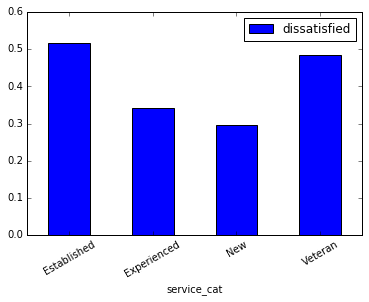

In [348]:
%matplotlib inline
combined_updated_agg.plot(kind='bar', rot=30)

We can see that 'Established' (> 7 years) and 'Veteran' (> 11 years) are most likely to leave due to sort dissatisfaction.
'New' (less than 3 years old ) employees areleast likely to leave due to some sort of dissatisfaction